In [1]:
import cv2 
import os 
import glob 
from numpy import asarray
from PIL import Image, ImageFilter
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
#from skimage.feature import hog
#from skimage import exposure
img_dir = "D:\\dataset_lung_cancer_19_11_2021\\m\\Malignant cases" # Enter Directory of all images 

data_path = os.path.join(img_dir,'Malignant case*') 
files = glob.glob(data_path) 

data = [] 

original_data=[]
for f1 in files: 
    img = cv2.imread(f1) 
    v=img
    #make all images (512,512)
    img = cv2.resize(img, (512, 512))
    #remove noise
    img = cv2.GaussianBlur(img,(5,5),0)
   
    
    array = asarray(img)
    #see edges 
    img=Image.fromarray((array))
    final= img.filter(ImageFilter.Kernel((3, 3), (-1, -1, -1, -1, 8,-1, -1, -1, -1), 1, 0))
    img=final+array  
    img=Image.fromarray((img))
    #img = img.filter(ImageFilter.FIND_EDGES)
    # Convert the image to grayscale
    img = img.convert("L")
    img = asarray(img)
    #segmnation
    ret, img = cv2.threshold(img, 120, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU) 
    #d, img = hog(img, orientations=9 ,pixels_per_cell=(4, 4)
    #                ,cells_per_block=(2, 2), visualize=True)# multichannel=True
    #img = exposure.rescale_intensity(img, in_range=(0, 10)) 
 
    #append in=mage in data
    data.append(img)
    original_data.append(v)
data

[array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0

In [2]:
print(files)

['D:\\dataset_lung_cancer_19_11_2021\\m\\Malignant cases\\Malignant case (1).jpg', 'D:\\dataset_lung_cancer_19_11_2021\\m\\Malignant cases\\Malignant case (10).jpg', 'D:\\dataset_lung_cancer_19_11_2021\\m\\Malignant cases\\Malignant case (100).jpg', 'D:\\dataset_lung_cancer_19_11_2021\\m\\Malignant cases\\Malignant case (101).jpg', 'D:\\dataset_lung_cancer_19_11_2021\\m\\Malignant cases\\Malignant case (102).jpg', 'D:\\dataset_lung_cancer_19_11_2021\\m\\Malignant cases\\Malignant case (103).jpg', 'D:\\dataset_lung_cancer_19_11_2021\\m\\Malignant cases\\Malignant case (104).jpg', 'D:\\dataset_lung_cancer_19_11_2021\\m\\Malignant cases\\Malignant case (105).jpg', 'D:\\dataset_lung_cancer_19_11_2021\\m\\Malignant cases\\Malignant case (106).jpg', 'D:\\dataset_lung_cancer_19_11_2021\\m\\Malignant cases\\Malignant case (107).jpg', 'D:\\dataset_lung_cancer_19_11_2021\\m\\Malignant cases\\Malignant case (108).jpg', 'D:\\dataset_lung_cancer_19_11_2021\\m\\Malignant cases\\Malignant case (109).

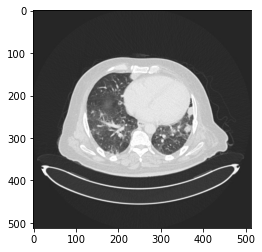

In [3]:
plt.imshow(original_data[10])

In [4]:
img_dir_n = "D:\\dataset_lung_cancer_19_11_2021\\m\\Normal cases" # Enter Directory of all images
data_path_n = os.path.join(img_dir_n,'*g') 
files_n = glob.glob(data_path_n) 
data_n = []
original_data_n=[]
for f2 in files_n: 
    img_n = cv2.imread(f2) 
    
    v_n=img_n
    #make all images (512,512)
    img_n = cv2.resize(img_n, (512, 512))
    #remove noise
    img_n = cv2.GaussianBlur(img_n,(5,5),0)
   
    
    array_n = asarray(img_n)
    #see edges 
    img_n=Image.fromarray((array_n))
    final_n= img_n.filter(ImageFilter.Kernel((3, 3), (-1, -1, -1, -1, 8,-1, -1, -1, -1), 1, 0))
    img_n=final_n+array_n  
    img_n=Image.fromarray((img_n))
    #img = img.filter(ImageFilter.FIND_EDGES)
    # Convert the image to grayscale
    img_n = img_n.convert("L")
    img_n = asarray(img_n)
    ret, img_n = cv2.threshold(img_n, 120, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU) 
    #feature extraction using hog
#     d, img_n = hog(img_n, orientations=9 ,pixels_per_cell=(4, 4)
#                    ,cells_per_block=(2, 2), visualize=True)# multichannel=True
#    img_n = exposure.rescale_intensity(img_n, in_range=(0, 10)) 
 
    #append in=mage in data
    data_n.append(img_n)
    original_data_n.append(v_n)
data_n

[array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0

In [5]:
data[0]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [6]:
data_n[0]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [7]:
#lenght of data_n 
x = len(data_n)
x

416

In [8]:
#lenght of data
y = len(data)
y

561

In [9]:
#to make label_normal zeros
label_n=np.zeros(x)
n = len(label_n)
label_n

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [10]:
#normal case lenght
n

416

In [11]:
#to make label_Malignantl ones
label=np.ones(y)
m = len(label)
label

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [12]:
# Malignant case lenght
m

561

In [13]:
#concatenate to make general array have all cases normal and Malignant 0/1
genaral_labels=np.concatenate((label,label_n ), axis=None)
genaral_labels[3]

1.0

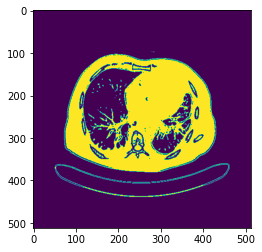

In [14]:
#concatenate to make general array have all cases normal and Malignant images
genaral_data=data+data_n
genaral_data[973]
plt.imshow(genaral_data[0])

In [15]:
o = len(genaral_data)
o

977

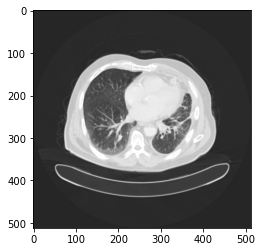

In [16]:
#make all images (512,512)
import matplotlib.pyplot as plt
c = cv2.resize(original_data[0], (512, 512))
plt.imshow(c)

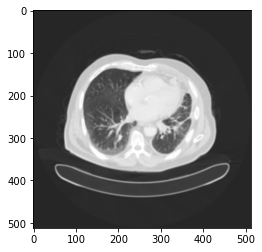

In [17]:
#remove noise 
b = cv2.GaussianBlur(original_data[0],(5,5),0)  
plt.imshow(b)

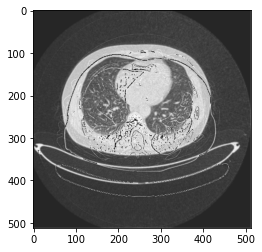

In [18]:
# Laplacian_operator  to edges
w = asarray(original_data[0]) 
#see edges 
original_data[0]=Image.fromarray((w))
a= original_data[0].filter(ImageFilter.Kernel((3, 3), (-1, -1, -1, -1, 8,-1, -1, -1, -1), 1, 0))
original_data[0]=a+array_n  
original_data[0]=Image.fromarray((original_data[0]))
plt.imshow(original_data[0])

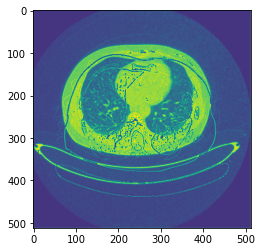

In [19]:
original_data[0] = original_data[0].convert("L")
plt.imshow(original_data[0])

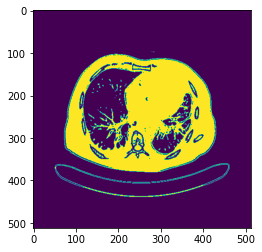

In [20]:
plt.imshow(genaral_data[0])

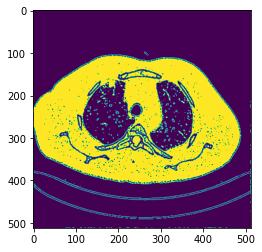

In [21]:
plt.imshow(genaral_data[700])

In [22]:
img.shape

(512, 512)

In [23]:
#make all images (512,512)
#img = cv2.resize(img, (512, 512))

In [24]:
#remove noise
#x = cv2.GaussianBlur(data[0],(5,5),0)
#x

In [25]:
ddepth = cv2.CV_16S
kernel_size = 3
data[0]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [26]:

#src_gray = cv2.cvtColor(data[0], cv2.COLOR_BGR2GRAY)
#src_gray



In [27]:
#plt.imshow(src_gray)

In [28]:
#dst = cv2.Laplacian(src_gray, ddepth, ksize=kernel_size)
#dst

In [29]:
#plt.imshow(dst)

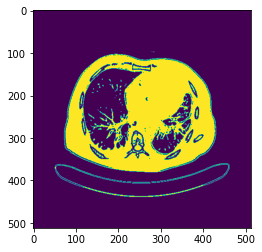

In [30]:
ret, thresh1 = cv2.threshold(data[0], 120, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU) 
plt.imshow(thresh1)

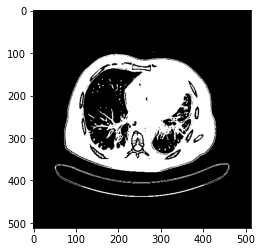

In [31]:
import cv2
import numpy as np

ret, thresh4 = cv2.threshold(data[0], 110, 255, cv2.THRESH_TOZERO)

 
# the window showing output images
# with the corresponding thresholding
# techniques applied to the input images

plt.imshow(thresh4,cmap='gray')


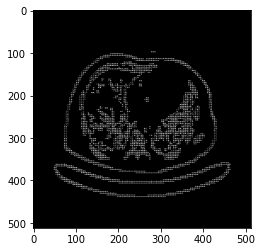

(0.0, 1.0, 0.0, 1.0)

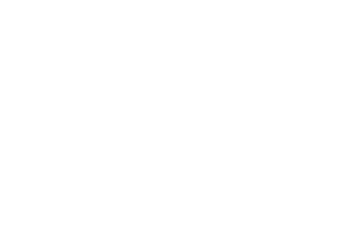

In [32]:
from skimage.io import imread
from skimage.transform import resize
from skimage.feature import hog
from skimage import exposure
import matplotlib.pyplot as plt

fd, hog_image = hog(data[0], orientations=9 ,pixels_per_cell=(4, 4)
                    ,cells_per_block=(2, 2), visualize=True)# multichannel=True
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10)) 
plt.imshow(hog_image_rescaled, cmap=plt.cm.gray) 

plt.show()
plt.axis("off")
#plt.imshow(hog_image)

In [33]:
x=np.array(genaral_data)
genaral_data=x
x.shape
x[500]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(genaral_data, genaral_labels, test_size=0.2)
print(len(X_train),"train +",len(y_test),"test")

781 train + 196 test


In [35]:
y_train.shape

(781,)

In [36]:
X_train.shape

(781, 512, 512)

In [37]:
genaral_data.shape

(977, 512, 512)

In [38]:
nsamples, nx, ny = X_train.shape
d2_train_x = X_train.reshape((nsamples,nx*ny))
d2_train_x.shape

(781, 262144)

In [39]:
X_train.shape

(781, 512, 512)

In [40]:
X_test.shape

(196, 512, 512)

In [41]:
nsamples, nx, ny = X_test.shape
d2_test = X_test.reshape((nsamples,nx*ny))
d2_test.shape

(196, 262144)

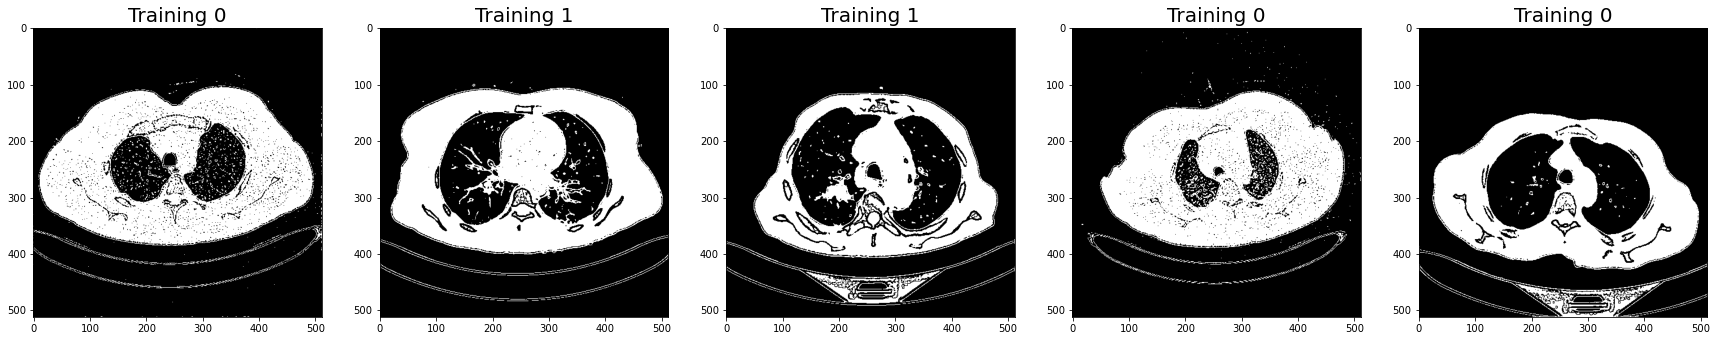

In [42]:
plt.figure(figsize=(30,20))
for index,(genaral_data, genaral_labels) in enumerate(zip(X_train[0:5],y_train[0:5])):
    plt.subplot(1,5,index+1)
    plt.imshow(np.reshape(genaral_data,(512,512)),cmap='gray')
    plt.title('Training %d' % genaral_labels,fontsize=20)
    plt.plot()

In [43]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=10, solver='lbfgs', verbose=2)#C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   #intercept_scaling=1, l1_ratio=None, max_iter=100,
                   #multi_class='warn', n_jobs=None, penalty='l2',
                   #random_state=0, tol=0.0001,
                   #warm_start=False

model.fit(d2_train_x,y_train)
y_pred=model.predict(d2_test)
from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Accuracy: 0.9795918367346939


E:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.0s finished


<AxesSubplot:>

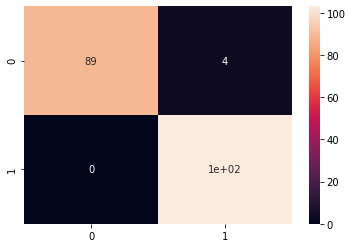

In [44]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True)

In [45]:
pd.DataFrame(np.c_[y_test , y_pred] , columns=["Actual" , "Predicted"])

,Actual,Predicted
0,0.0,0.0
1,1.0,1.0
2,1.0,1.0
3,0.0,0.0
4,0.0,0.0
...,...,...
191,0.0,0.0
192,0.0,0.0
193,0.0,0.0
194,1.0,1.0


In [46]:
y_pred

array([0., 1., 1., 0., 0., 0., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 0.,
       1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1., 1., 1., 0., 1., 0.,
       1., 0., 1., 1., 1., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1., 0., 0.,
       0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1.,
       1., 1., 1., 0., 0., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1.,
       0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1.,
       1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 1., 1., 1.,
       1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0.,
       0., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 1., 0., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 0.,
       0., 0., 0., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 0., 1.,
       1., 1., 1., 0., 0., 0., 0., 1., 0.])

In [47]:
from sklearn.ensemble import RandomForestClassifier


clf=RandomForestClassifier(n_estimators =40)

clf.fit(d2_train_x,y_train)


y_pred=clf.predict(d2_test)

from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9846938775510204


<AxesSubplot:>

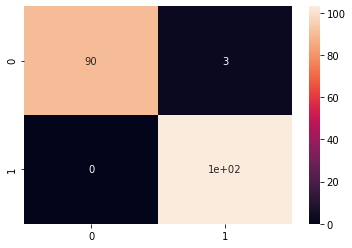

In [48]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True)

In [49]:
pd.DataFrame(np.c_[y_test , y_pred] , columns=["Actual" , "Predicted"])

,Actual,Predicted
0,0.0,0.0
1,1.0,1.0
2,1.0,1.0
3,0.0,0.0
4,0.0,0.0
...,...,...
191,0.0,0.0
192,0.0,0.0
193,0.0,1.0
194,1.0,1.0


In [50]:
data[0].shape

(512, 512)

In [51]:

c = data[0].reshape((1,512*512))
c.shape

(1, 262144)

In [52]:
y_pred=model.predict(c)
y_pred

array([1.])

In [53]:
data_n[0].shape

(512, 512)

In [54]:

e = data_n[0].reshape((1,512*512))
e.shape

(1, 262144)

In [55]:
y_pred=model.predict(e)
y_pred

array([0.])

In [56]:
from sklearn import svm


clf = svm.SVC(kernel='linear')


clf.fit(d2_train_x, y_train)


y_pred = clf.predict(d2_test)
from sklearn import metrics


print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


print("Precision:",metrics.precision_score(y_test, y_pred))


print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 1.0
Precision: 1.0
Recall: 1.0


<AxesSubplot:>

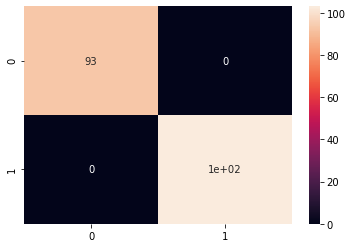

In [57]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True)

In [58]:
pd.DataFrame(np.c_[y_test , y_pred] , columns=["Actual" , "Predicted"])

,Actual,Predicted
0,0.0,0.0
1,1.0,1.0
2,1.0,1.0
3,0.0,0.0
4,0.0,0.0
...,...,...
191,0.0,0.0
192,0.0,0.0
193,0.0,0.0
194,1.0,1.0


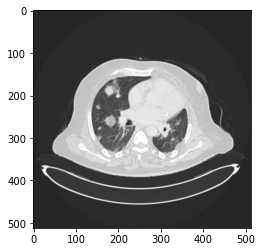

In [59]:
plt.imshow(original_data[2])

In [60]:
from sklearn.naive_bayes import GaussianNB  
naive_bayes = GaussianNB()  
naive_bayes.fit(d2_train_x, y_train)
y_pred = naive_bayes.predict(d2_test)

from sklearn import metrics

metrics.accuracy_score (y_pred, y_test)


0.8061224489795918

<AxesSubplot:>

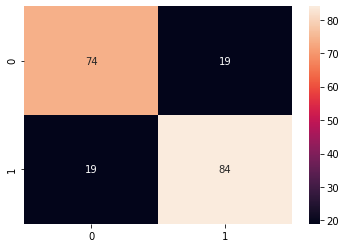

In [61]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True)

In [62]:
pd.DataFrame(np.c_[y_test , y_pred] , columns=["Actual" , "Predicted"])

,Actual,Predicted
0,0.0,0.0
1,1.0,1.0
2,1.0,1.0
3,0.0,0.0
4,0.0,0.0
...,...,...
191,0.0,1.0
192,0.0,0.0
193,0.0,1.0
194,1.0,1.0


In [63]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(d2_train_x, y_train)


y_pred = knn.predict(d2_test)

from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100)

Accuracy: 99.48979591836735


<AxesSubplot:>

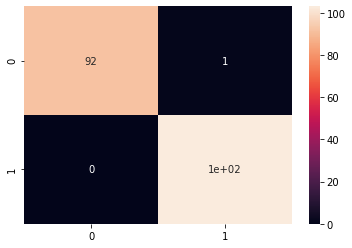

In [64]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True)

In [65]:
pd.DataFrame(np.c_[y_test , y_pred] , columns=["Actual" , "Predicted"])

,Actual,Predicted
0,0.0,0.0
1,1.0,1.0
2,1.0,1.0
3,0.0,0.0
4,0.0,0.0
...,...,...
191,0.0,0.0
192,0.0,0.0
193,0.0,0.0
194,1.0,1.0


In [66]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import plot_tree
dtree = DecisionTreeClassifier()
dtree.fit(d2_train_x,y_train)
print('Decision Tree Classifier Created')

Decision Tree Classifier Created


In [67]:
y_pred = dtree.predict(d2_test)
print("Classification report - \n", classification_report(y_test,y_pred))

Classification report - 
               precision    recall  f1-score   support

         0.0       0.88      0.86      0.87        93
         1.0       0.88      0.89      0.88       103

    accuracy                           0.88       196
   macro avg       0.88      0.88      0.88       196
weighted avg       0.88      0.88      0.88       196



In [68]:
from sklearn import metrics


print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8775510204081632


In [69]:
print("Precision:",metrics.precision_score(y_test, y_pred))


print("Recall:",metrics.recall_score(y_test, y_pred))

Precision: 0.8761904761904762
Recall: 0.8932038834951457


<AxesSubplot:>

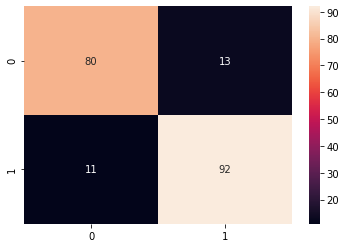

In [70]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True)

In [71]:
pd.DataFrame(np.c_[y_test , y_pred] , columns=["Actual" , "Predicted"])

,Actual,Predicted
0,0.0,0.0
1,1.0,1.0
2,1.0,1.0
3,0.0,0.0
4,0.0,1.0
...,...,...
191,0.0,0.0
192,0.0,0.0
193,0.0,1.0
194,1.0,1.0


In [72]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(n_estimators=40)
gb.fit(d2_train_x, y_train)
y_pred = gb.predict(d2_test)
from sklearn import metrics

print('Accuracy of the Model: ', metrics.accuracy_score(y_test, y_pred))

Accuracy of the Model:  0.9693877551020408


<AxesSubplot:>

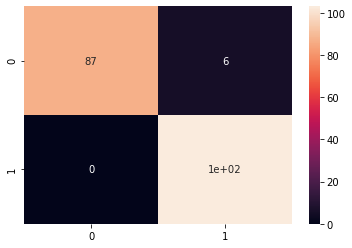

In [73]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True)

In [74]:
pd.DataFrame(np.c_[y_test , y_pred] , columns=["Actual" , "Predicted"])

,Actual,Predicted
0,0.0,0.0
1,1.0,1.0
2,1.0,1.0
3,0.0,0.0
4,0.0,0.0
...,...,...
191,0.0,0.0
192,0.0,0.0
193,0.0,1.0
194,1.0,1.0
